In [12]:
cd ..

/Users/nicolevandeweijer/PycharmProjects/ma-communicative-robots-fork/projects/memory


In [13]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [14]:
import json
from glob import glob
from tqdm.notebook import tqdm
import os
import random

from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("tscholak/t5.1.1.lm100k.base")
model = T5ForConditionalGeneration.from_pretrained("tscholak/t5.1.1.lm100k.base")


def read_json(path):
    """Read json file.

    Args
    ----
    path: path to the json

    Returns
    -------
    loaded: loaded dict

    """
    with open(path, "r") as stream:
        loaded = json.load(stream)

    return loaded

## Metrics train set

In [31]:
pred_answers_train = []
correct_answers_train = []
for path in tqdm(glob("./data/*.json")):
    data = read_json(path)
    for i in data["train"]:
        pred_answer = str((i.get("prediction_hand_crafted")))
        correct_answer = str((i.get("correct_answer")))

        pred_answers_train.append(pred_answer)
        correct_answers_train.append(correct_answer)

  0%|          | 0/7 [00:00<?, ?it/s]

In [30]:
p_r_f_train = precision_recall_fscore_support(
    correct_answers_train, pred_answers_train, average="weighted"
)
acc_train = accuracy_score(correct_answers_train, pred_answers_train)

print(f"Accuracy: {acc_train}")
print(f"Precision: {p_r_f_train[0]}")
print(f"Recall: {p_r_f_train[1]}")
print(f"Fscore: {p_r_f_train[2]}")

Accuracy: 0.40066964285714285
Precision: 0.9636948851587009
Recall: 0.40066964285714285
Fscore: 0.5422078430295384


/Users/nicolevandeweijer/opt/anaconda3/envs/combots_project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


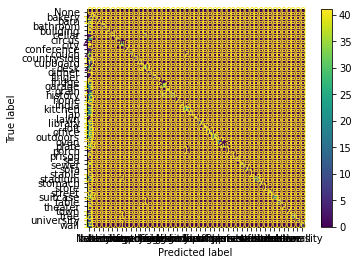

In [33]:
ConfusionMatrixDisplay.from_predictions(correct_answers_train, pred_answers_train)
plt.show()

## Metrics val set

In [34]:
pred_answers_val = []
correct_answers_val = []
for path in tqdm(glob("./data/*.json")):
    data = read_json(path)
    for i in data["val"]:
        pred_answer = str((i.get("prediction_hand_crafted")))
        correct_answer = str((i.get("correct_answer")))

        if pred_answer is not None:
            pred_answers_val.append(pred_answer)
            correct_answers_val.append(correct_answer)

  0%|          | 0/7 [00:00<?, ?it/s]

In [35]:
p_r_f_val = precision_recall_fscore_support(
    correct_answers_val, pred_answers_val, average="weighted"
)
acc_val = accuracy_score(correct_answers_val, pred_answers_val)

print(f"Accuracy: {acc_val}")
print(f"Precision: {p_r_f_val[0]}")
print(f"Recall: {p_r_f_val[1]}")
print(f"Fscore: {p_r_f_val[2]}")

Accuracy: 0.4654017857142857
Precision: 0.9810096153846154
Recall: 0.4654017857142857
Fscore: 0.6101438955539569


/Users/nicolevandeweijer/opt/anaconda3/envs/combots_project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Metrics test set

In [36]:
pred_answers_test = []
correct_answers_test = []
for path in tqdm(glob("./data/*.json")):
    data = read_json(path)
    for i in data["test"]:
        pred_answer = str((i.get("prediction_hand_crafted")))
        correct_answer = str((i.get("correct_answer")))

        if pred_answer is not None:
            pred_answers_test.append(pred_answer)
            correct_answers_test.append(correct_answer)

  0%|          | 0/7 [00:00<?, ?it/s]

In [37]:
p_r_f_test = precision_recall_fscore_support(
    correct_answers_test, pred_answers_test, average="weighted"
)
acc_test = accuracy_score(correct_answers_test, pred_answers_test)

print(f"Accuracy: {acc_test}")
print(f"Precision: {p_r_f_test[0]}")
print(f"Recall: {p_r_f_test[1]}")
print(f"Fscore: {p_r_f_test[2]}")

Accuracy: 0.4095982142857143
Precision: 0.9873883928571429
Recall: 0.4095982142857143
Fscore: 0.5663866624120253


/Users/nicolevandeweijer/opt/anaconda3/envs/combots_project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
